In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Introduction

### The basic elements of network:

(1) Nodes (another name vertices)

(2) Edges: connections or links between node

### Directed vs Undirected Network

(1) Directed network => One-way relationship between nodes.
> E.g: On platforms like Twitter, where one user follows another, the relationship is directional (user A follows user B, but user B may not follow user A).

(2) Undirected Network => Two-way relationship between nodes.
> E.g: On platforms like Facebook, where the friendship relationship is mutual (if user A is friends with user B, then user B is also friends with user A).

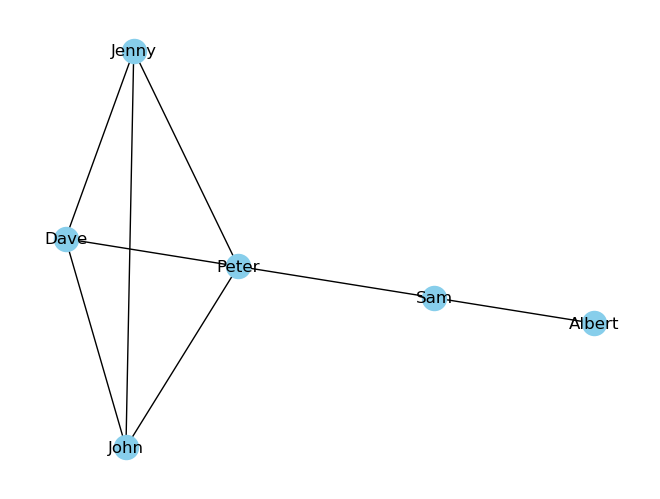

In [4]:
df = pd.DataFrame([
    ("Dave", "Jenny"), ("Peter", "Jenny"), ("John", "Jenny"),
    ("Dave", "Peter"), ("Dave", "John"), ("Peter", "Sam"),
    ("Sam", "Albert"), ("Peter", "John")
    ], columns=['from', 'to'])
G = nx.from_pandas_edgelist(df, 'from', 'to')
nx.draw(G, with_labels=True, node_color='skyblue')
plt.show()

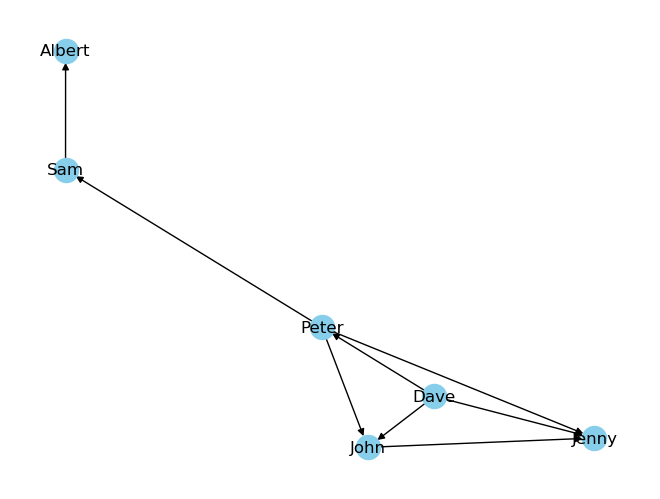

In [6]:
# Use nx.DiGraph to create a directed network

G = nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.DiGraph())
nx.draw(G, with_labels=True, node_color='skyblue')
plt.show()

# Visualizing Networks

> Network plots have a variety of plots (depending on the algorithm). The two simplest plots are Circular and Grid.

NOTE: The x and y coordinates are meaningless in network plots.


Plot Readibility Principles (Dunne & Shneiderman, 2009):
- Every node should be visible.
- For every node, you should be able to count its degree.
- For every link, you should be able to follow it from source to destination.
- Clusters and outliers should be identifable.

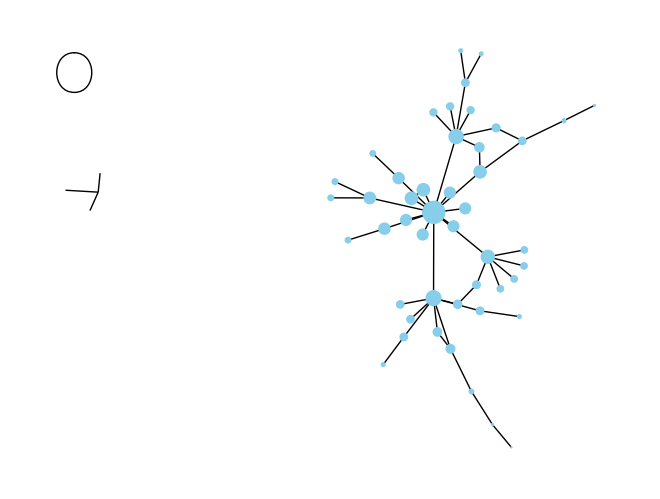

In [8]:
drug_df = pd.read_csv("./DMBA/dataset/drug.csv")

G = nx.from_pandas_edgelist(drug_df, 'Entity', 'Related Entity')

centrality = nx.eigenvector_centrality(G)
node_size = [400 * centrality[n] for n in G.nodes]
nx.draw(G, with_labels=False, node_color='skyblue', node_size=node_size)
plt.show()

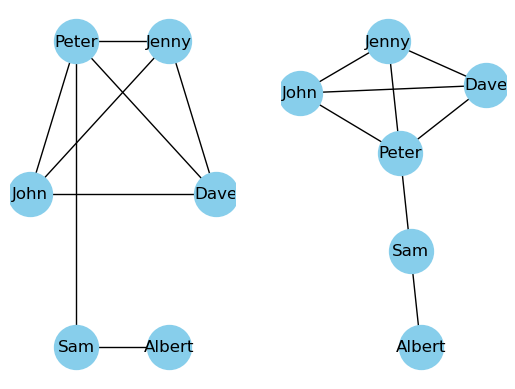

In [10]:
# Drawing with circular and grid (kamada_kawai)

G = nx.from_pandas_edgelist(df, 'from', 'to')
plt.subplot(121)
nx.draw_circular(G, with_labels=True, node_color='skyblue', node_size=1000)
plt.subplot(122)
nx.draw_kamada_kawai(G, with_labels=True, node_color='skyblue', node_size=1000)
plt.show()